# Easy

In [1]:
import pandas as pd

df = pd.read_csv('../data/marketing_campaign.csv', sep=';')
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


Complain - 1 если покупатель жаловался за последние два года, иначе 0

In [2]:
complains_number = df['Complain'].sum()
print(f'Количество жалоб: {complains_number}')


Количество жалоб: 21



### Посчитаем для людей общую сумму всех покупок

In [3]:
# Имена столбцов, начинающихся с Mnt
mnt_columns = [i for i in list(df.columns) if i.startswith('Mnt')]
# На всякий случай (чтобы если запустить этот блок несколько раз, ничего не поломалось)
if 'MntAll' in mnt_columns: mnt_columns.remove('MntAll')

# Новый столбец MntAll с суммой потраченной на все продукты
df['MntAll'] = df[mnt_columns].sum(axis=1)
df['MntAll'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: MntAll, dtype: float64

Заметим, что покупателями являются все, так как минимальное значение столбца MntAll равно 5. Из этого следует, что средний возраст покупателей будет равен среднему возрасту всех людей в датасете.

In [4]:
from datetime import datetime
current_year = datetime.now().year

df['Age'] = current_year - df['Year_Birth']
print('Средний возраст покупателей:', df['Age'].mean())

Средний возраст покупателей: 55.19419642857143


***
# Medium

Посмотрим, какие есть уровни образования и семейные положения

In [5]:
print(df['Education'].unique())
print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


Добавим численное значение для уровня образования
 0 - basic
 1 - 2n Cycle
 2 - Graduation
 3 - Master
 4 - PhD

И для семейного положения
 1 - Absurd
 2 - Alone
 3 - Divorced
 4 - Married
 5 - Single
 6 - Together
 7 - Widow
 8 - YOLO


In [6]:
education_to_number = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}

marital_status_to_number = {
    'Absurd': 1,
    'Alone': 2,
    'Divorced': 3,
    'Married': 4,
    'Single': 5,
    'Together': 6,
    'Widow': 7,
    'YOLO': 8
}

df['Education_numeric'] = df['Education'].map(lambda x: education_to_number[x])
df['Marital_Status_numeric'] = df['Marital_Status'].map(lambda x: marital_status_to_number[x])

___
### Теперь построим все попарные графики

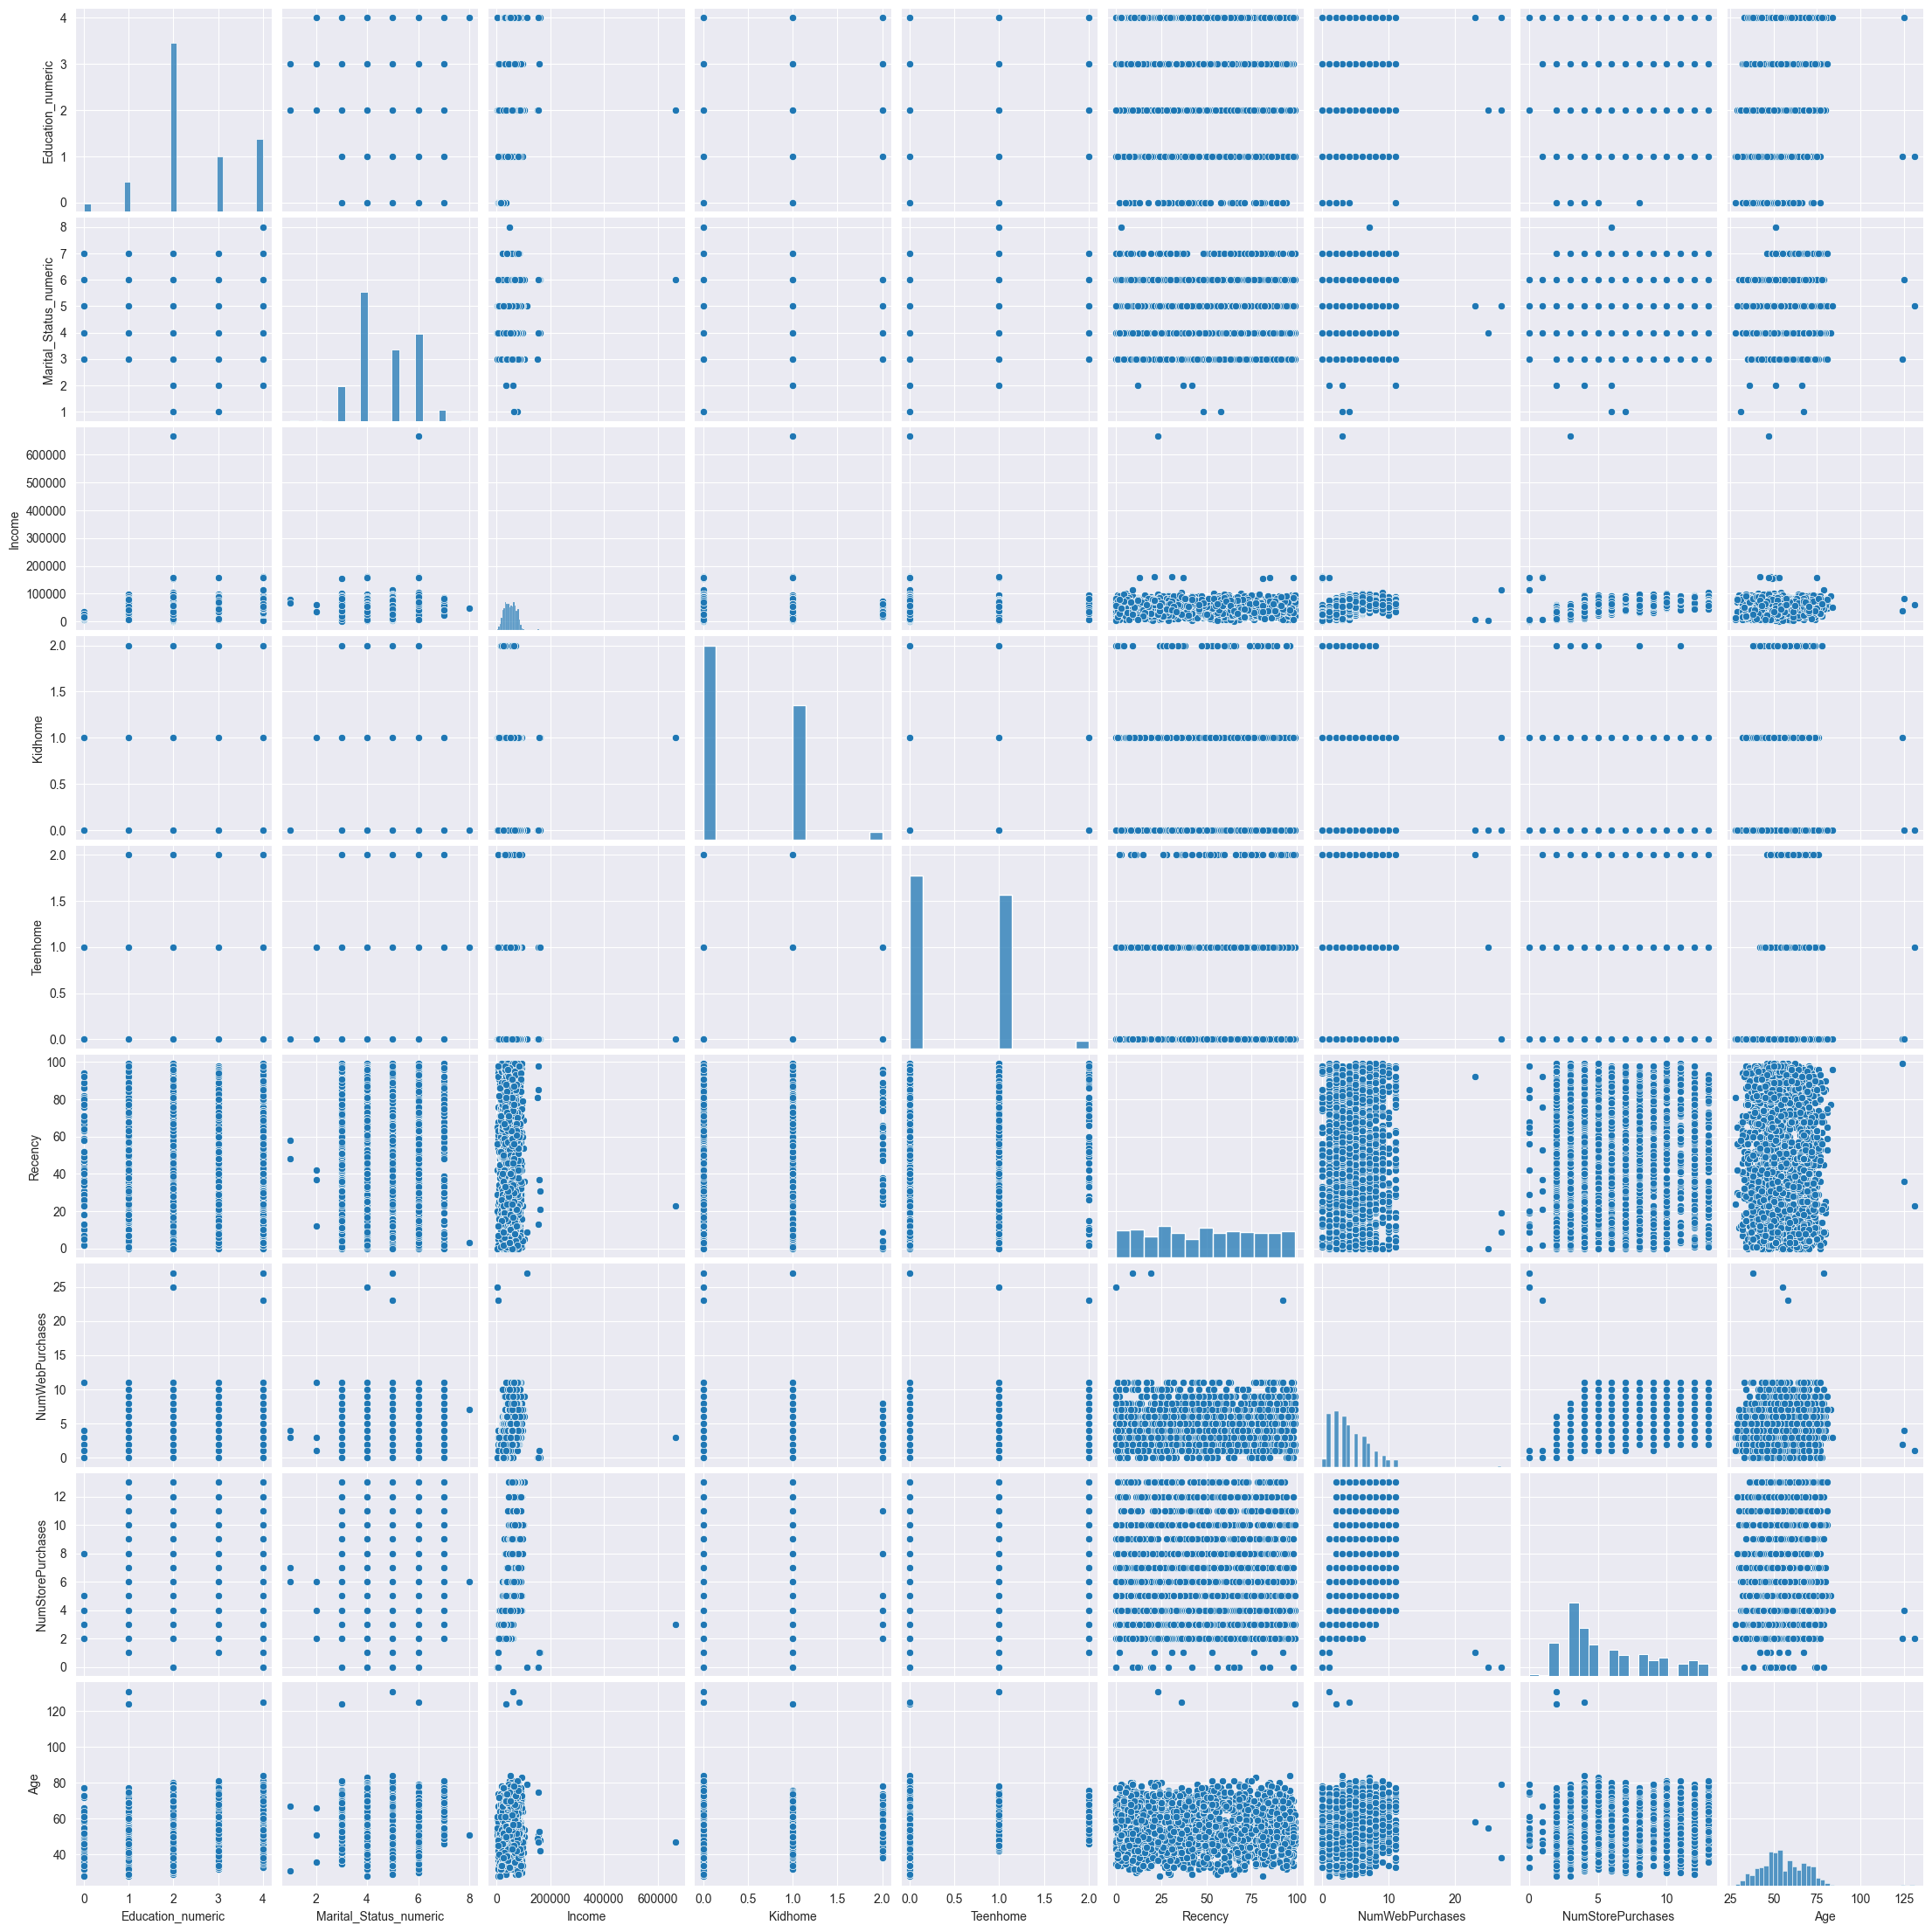

In [7]:
import seaborn as sns

column_labels = [
    "Education_numeric",
    "Marital_Status_numeric",
    "Income",
    "Kidhome",
    "Teenhome",
    "Recency",
    "NumWebPurchases",
    "NumStorePurchases",
    "Age"
]

sns.pairplot(df[column_labels], kind='scatter')

##### Заметим, что в столбцах Income, NumWebPurchases, Age есть выбросы. Исправим их


Income - Основная часть находится до 100 тысяч долларов в год, но видно, что есть какое-то количество людей (7 штук) зарабатывающих примерно 180 тысяч, и один человек получающий 666666. Оставим значения до 100 тысяч, остальные приравняем к 1000000

NumWebPurchases - Оставим значения до 13, все большие сделаем равными 13


Age - Оставим значения до 90, все большие сделаем равными 90


In [8]:
df['Income'] = df['Income'].map(lambda x: min(x, 100000))
df['NumWebPurchases'] = df['NumWebPurchases'].map(lambda x: min(x, 13))
df['Age'] = df['Age'].map(lambda x: min(x, 90))

### Снова нарисуем графики

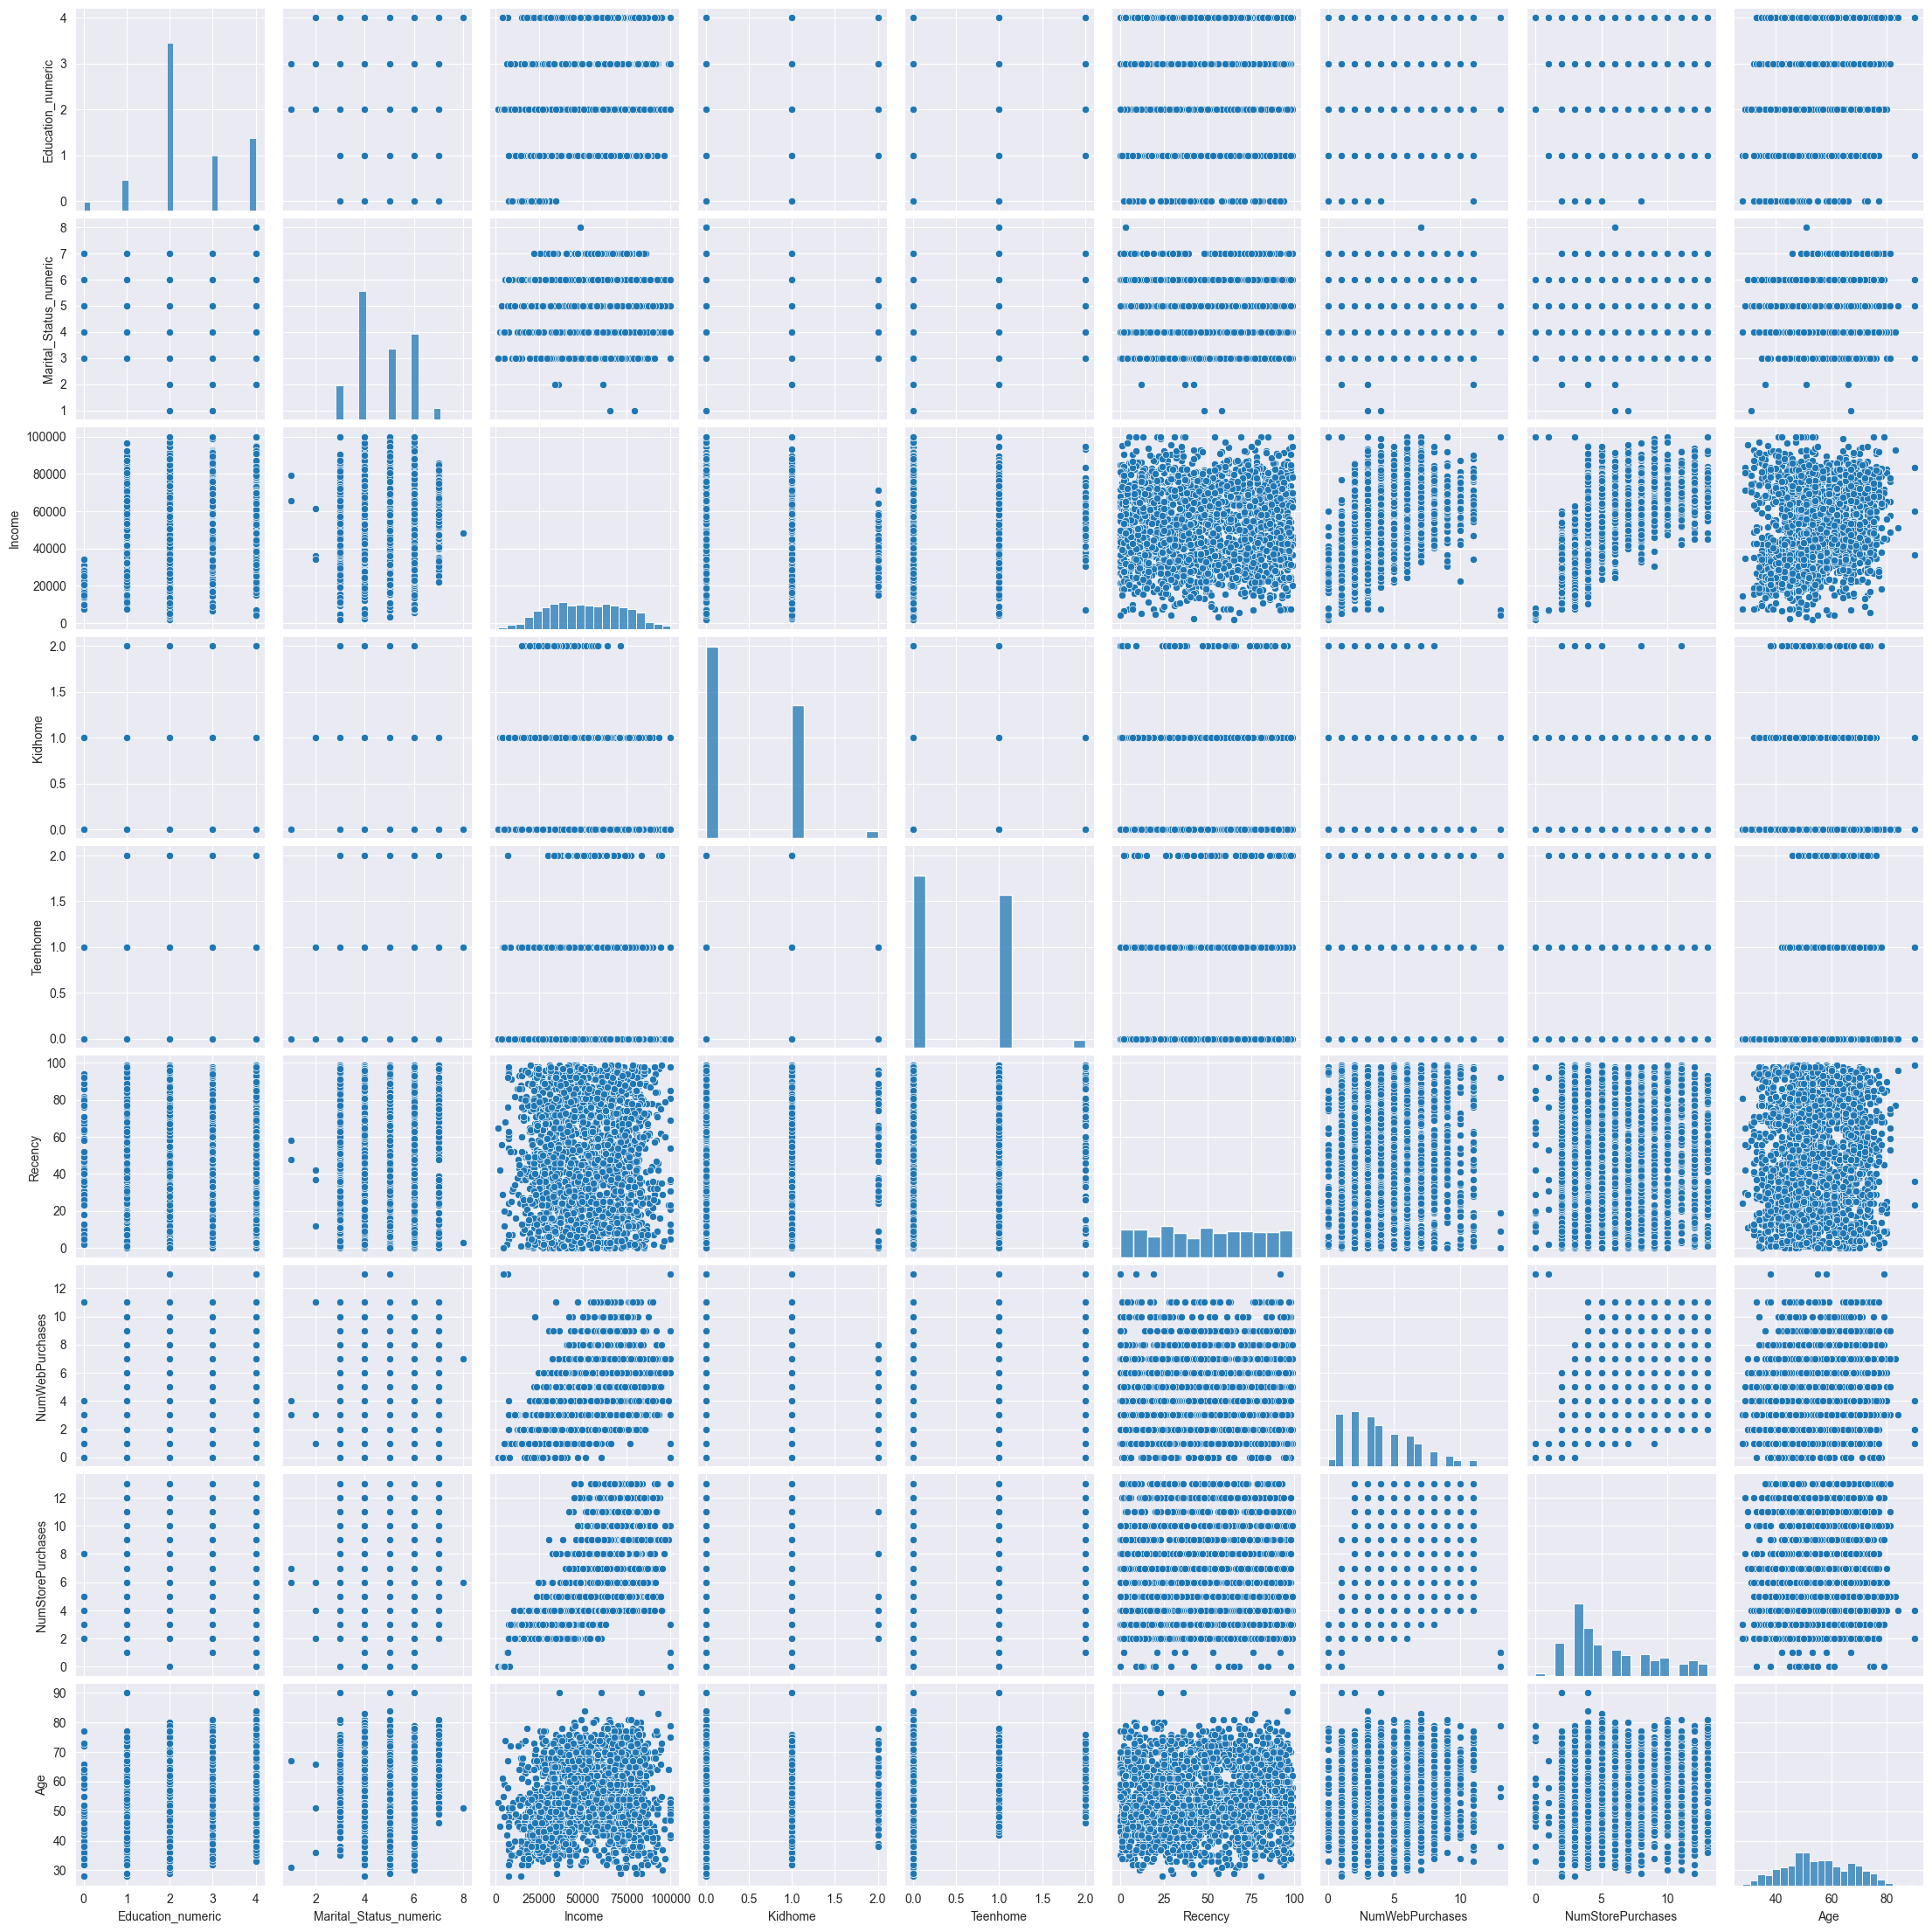

In [9]:
sns.pairplot(df[column_labels], kind='scatter')

Отсюда видно:
1) NumWebPurchases и NumStorePurchases зависят от Income. Чем больше доход, тем больше покупок.
2) Income зависит от Education. На самом низком уровне образования доход ограничен 40 тысячами.
3) NumWebPurchases и NumStorePurchases коррелируют друг с другом

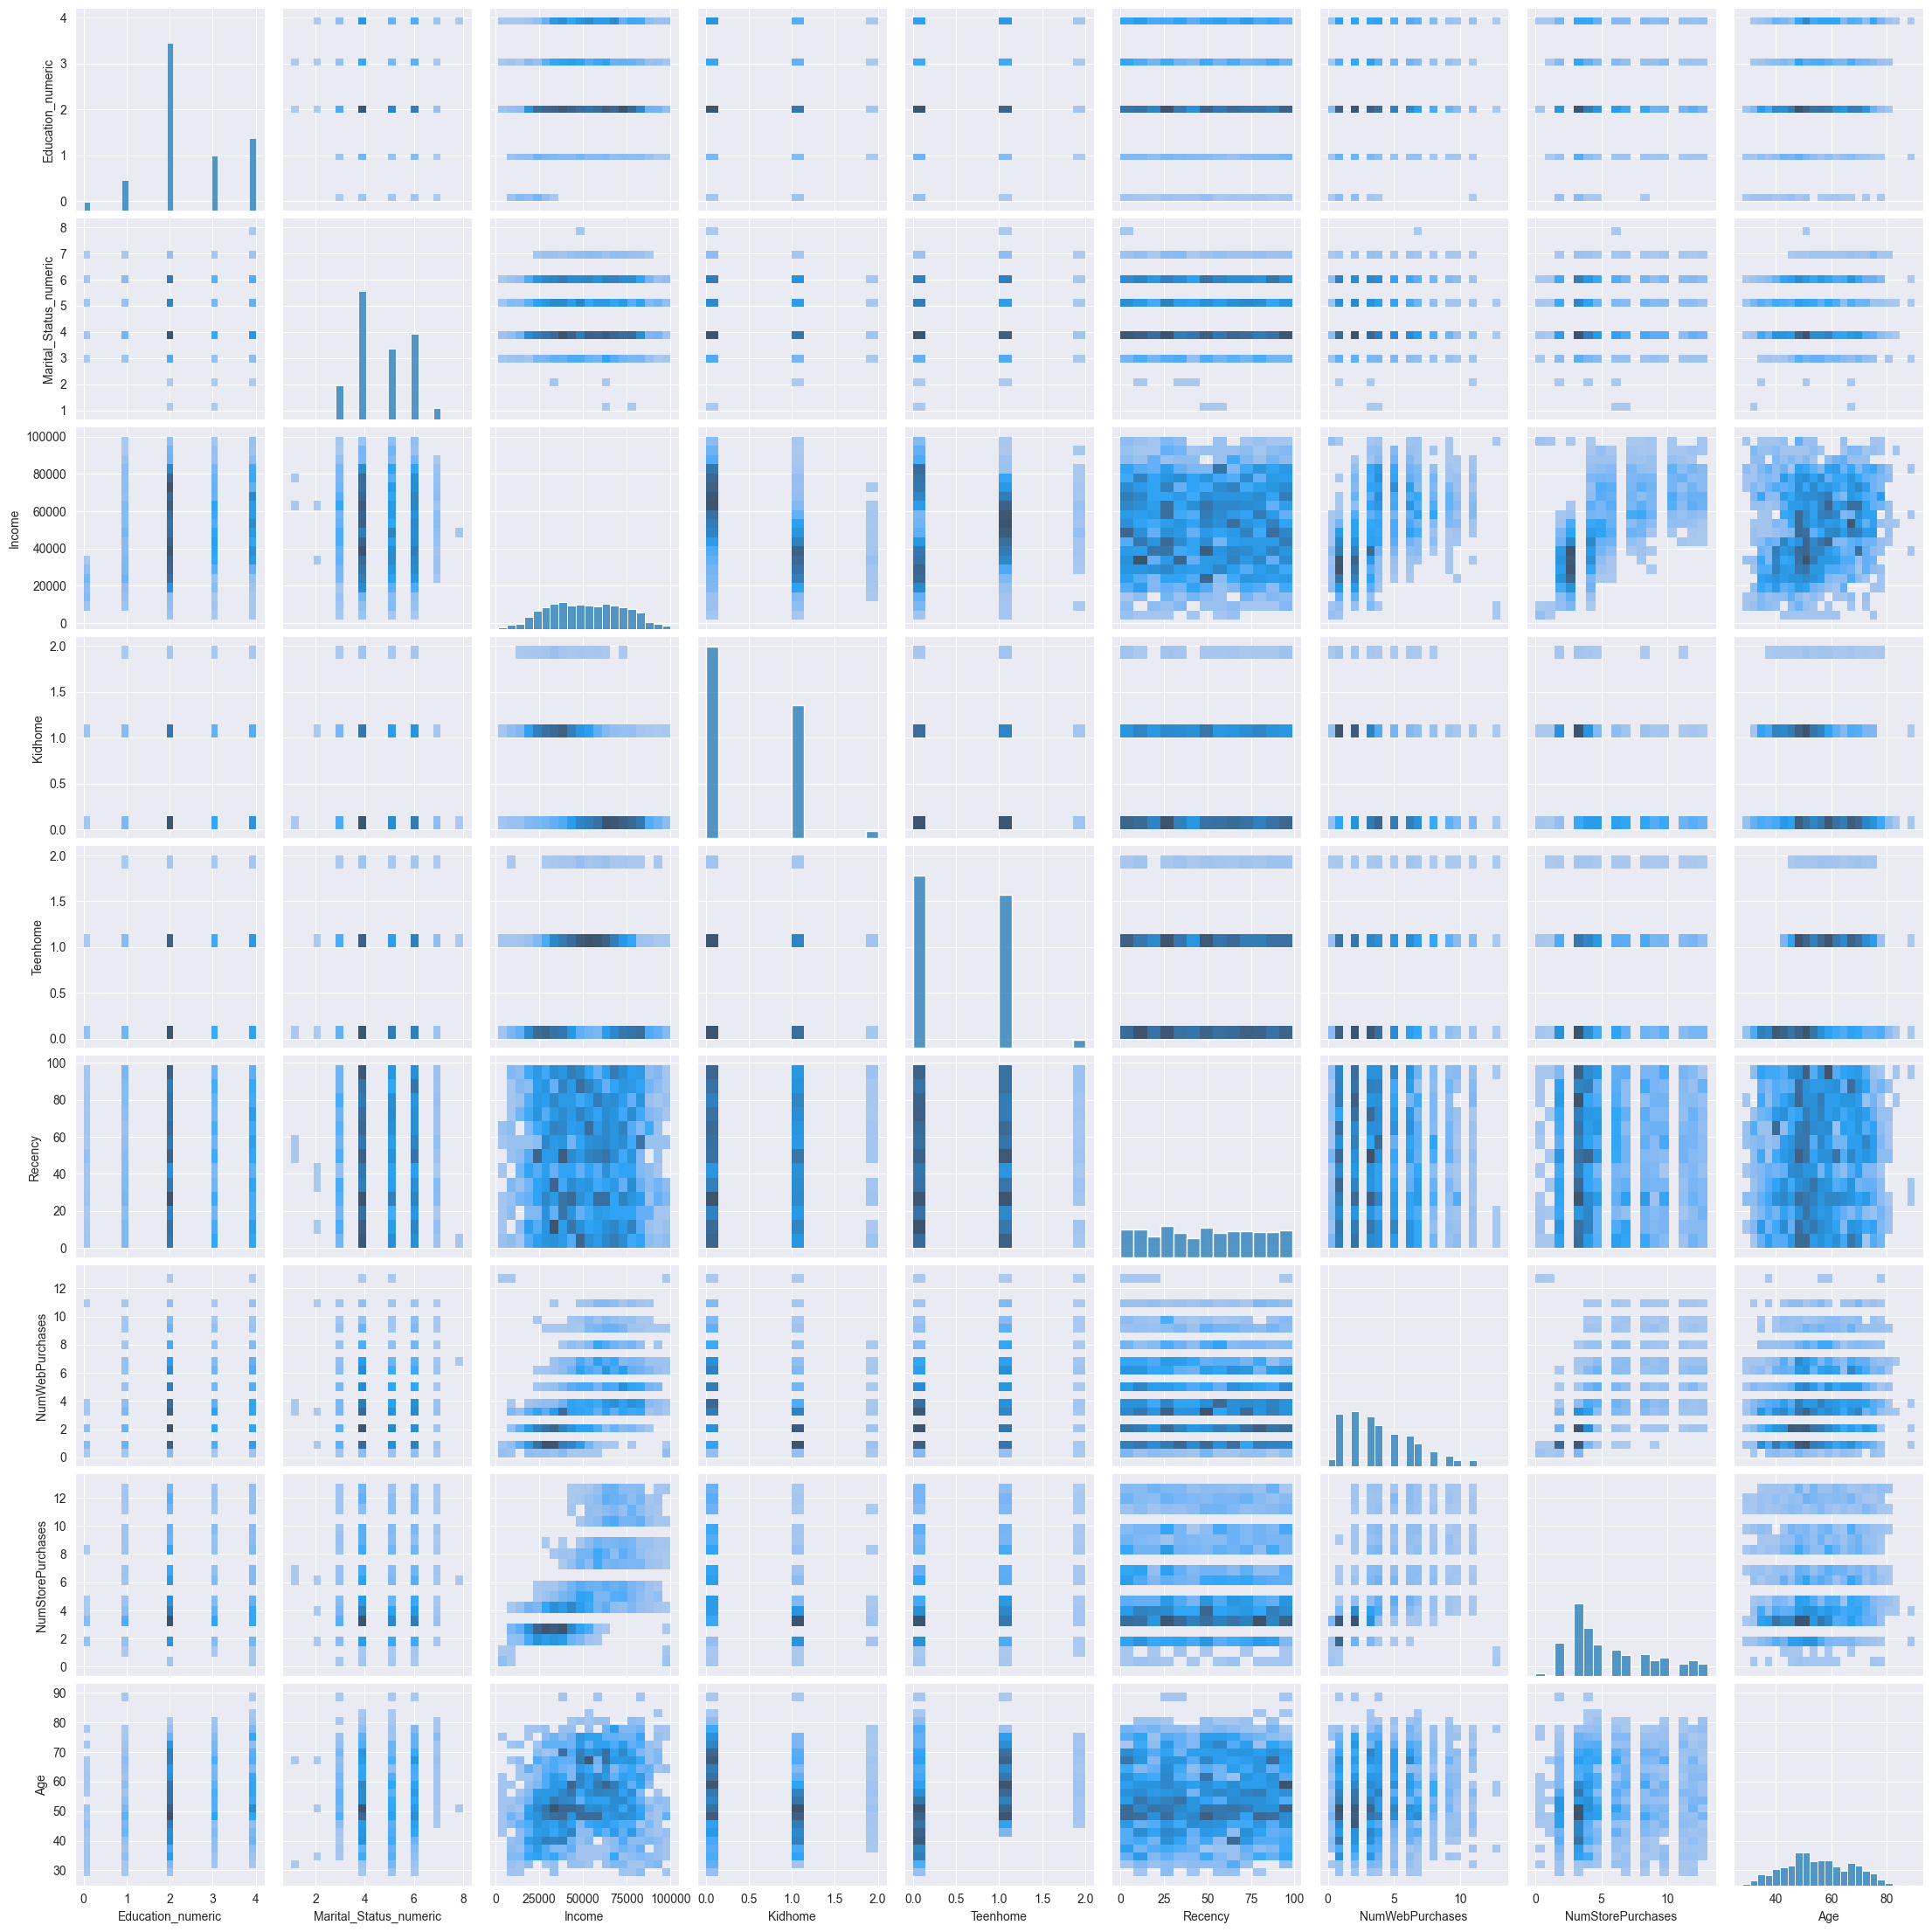

In [10]:
sns.pairplot(df[column_labels], kind='hist')

Тут можно заметить еще некоторые вещи:
1) Kidhome и Income. Люди у которых нет детей, зарабатывают больше чем те, у которых один ребенок, а те у кого один ребенок зарабатывают примерно столько же, сколько те у кого 2 ребенка.
2) Teenhome и Income. Люди без подростков в семье делятся на два класса: тех, у кого доход поменьше и тех, у кого доход побольше. Видимо связано с тем, что есть люди вообще без детей, а есть люди, у которых ребенок еще не стал подростком.